analyze the difference of NDCG score improvements between different datasets.

In [1]:
import sys
import json
from pathlib import Path
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from src.data import load_qa_format_source

In [15]:
import scipy as sp
from scipy import stats as st

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
projectdir = Path('..')

In [3]:
with open(projectdir / 'output/20_0310_edm2020_assist09/pre_dummy_epoch_size0.auto/report/20200309-2154/report.json', 'r') as f:
    ndcg_pre00_a09 = np.array(json.load(f)['indicator']['RPhard']['all'])
with open(projectdir / 'output/20_0310_edm2020_assist09/pre_dummy_epoch_size10.auto/report/20200309-2301/report.json', 'r') as f:
    ndcg_pre10_a09 = np.array(json.load(f)['indicator']['RPhard']['all'])
    
with open(projectdir / 'output/20_0310_edm2020_assist15/pre_dummy_epoch_size0.auto/report/20200310-0400/report.json', 'r') as f:
    ndcg_pre00_a15 = np.array(json.load(f)['indicator']['RPhard']['all'])
with open(projectdir / 'output/20_0310_edm2020_assist15/pre_dummy_epoch_size10.auto/report/20200310-0242/report.json', 'r') as f:
    ndcg_pre10_a15 = np.array(json.load(f)['indicator']['RPhard']['all'])
    
with open(projectdir / 'output/20_0310_edm2020_synthetic/pre_dummy_epoch_size0.auto/report/20200310-0920/report.json', 'r') as f:
    ndcg_pre00_syn = np.array(json.load(f)['indicator']['RPhard']['all'])
with open(projectdir / 'output/20_0310_edm2020_synthetic/pre_dummy_epoch_size10.auto/report/20200310-0913/report.json', 'r') as f:
    ndcg_pre10_syn = np.array(json.load(f)['indicator']['RPhard']['all'])

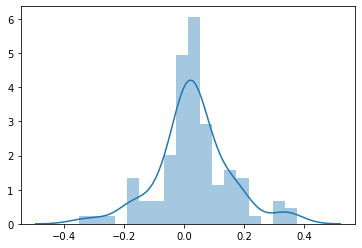

In [4]:
sns.distplot(ndcg_pre10_a09 - ndcg_pre00_a09)

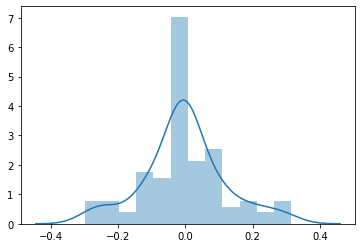

In [5]:
sns.distplot(ndcg_pre10_a15 - ndcg_pre00_a15)

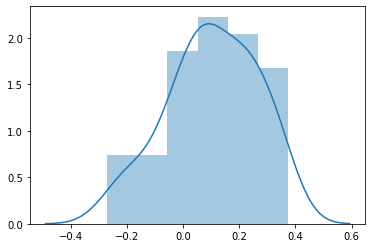

In [6]:
sns.distplot(ndcg_pre10_syn - ndcg_pre00_syn)

In [19]:

([len(ndcg_pre10_a09 - ndcg_pre00_a09), len(ndcg_pre10_a15 - ndcg_pre00_a15), len(ndcg_pre10_syn - ndcg_pre00_syn)])

[110, 100, 50]

In [31]:
data_list = [
(ndcg_pre10_a09 - ndcg_pre00_a09),
(ndcg_pre10_a15 - ndcg_pre00_a15),
(ndcg_pre10_syn - ndcg_pre00_syn),
]

In [23]:
a = (ndcg_pre10_a09 - ndcg_pre00_a09)
b = np.append(ndcg_pre10_a15 - ndcg_pre00_a15, np.repeat(np.nan, 110 - len(ndcg_pre00_a15)))
c = np.append(ndcg_pre10_syn - ndcg_pre00_syn, np.repeat(np.nan, 110 - len(ndcg_pre00_syn)))

In [28]:
data = pd.DataFrame({
    'a09': a, 'a15': b, 'syn': c
})

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a09     110 non-null    float64
 1   a15     100 non-null    float64
 2   syn     50 non-null     float64
dtypes: float64(3)
memory usage: 2.7 KB


In [42]:
st.shapiro(data)

(nan, 1.0)

## Bartlett

In [35]:
st.bartlett(*data_list)

BartlettResult(statistic=6.781591698902667, pvalue=0.033681860539864696)

## One-way ANOVA

In [36]:
st.f_oneway(*data_list)

F_onewayResult(statistic=10.876541725884904, pvalue=2.9219814811632827e-05)

## Tukey

In [39]:
def tukey_hsd( ind, *args ):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    data_arr = np.hstack( args ) 

    ind_arr = np.array([])
    for x in range(len(args)):
        ind_arr = np.append(ind_arr, np.repeat(ind[x], len(args[x]))) 
    
    print(pairwise_tukeyhsd(data_arr, ind_arr))
    
tukey_hsd(list(['a09','a15','syn']), *data_list)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   a09    a15  -0.0336 0.1529 -0.0763  0.009  False
   a09    syn   0.0721  0.004  0.0195 0.1247   True
   a15    syn   0.1057  0.001  0.0523 0.1592   True
---------------------------------------------------
